In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

%matplotlib inline

In [2]:
f = open('../data/test.csv', 'r')
csv_reader = csv.DictReader(f)

In [3]:
rows = [row for row in csv_reader]
sequences = {int(row['Id']): [int(s) for s in row['Sequence'].split(',')] for row in rows}
print(len(sequences.keys()))

113845


# Plot Random Sequences

In [4]:
from random import sample

In [5]:
def plot_seq(ax, seq):
    colors = ['k', 'b', 'y', 'r']
    filters = [lambda e: e[1] > 1, lambda e: e[1] == 1, lambda e: e[1] == 0, lambda e: e[1] < 0]
    i = range(1, len(seq) + 1)
    pnts = list(zip(i, seq))
    ax.plot(i, seq, color='k')
    for c, f in zip(colors,filters):
        try:
            x, y = zip(*list(filter(f, pnts)))
            ax.scatter(x, y, marker='o', color=c)
        except:
            pass
    ax.axis('off')

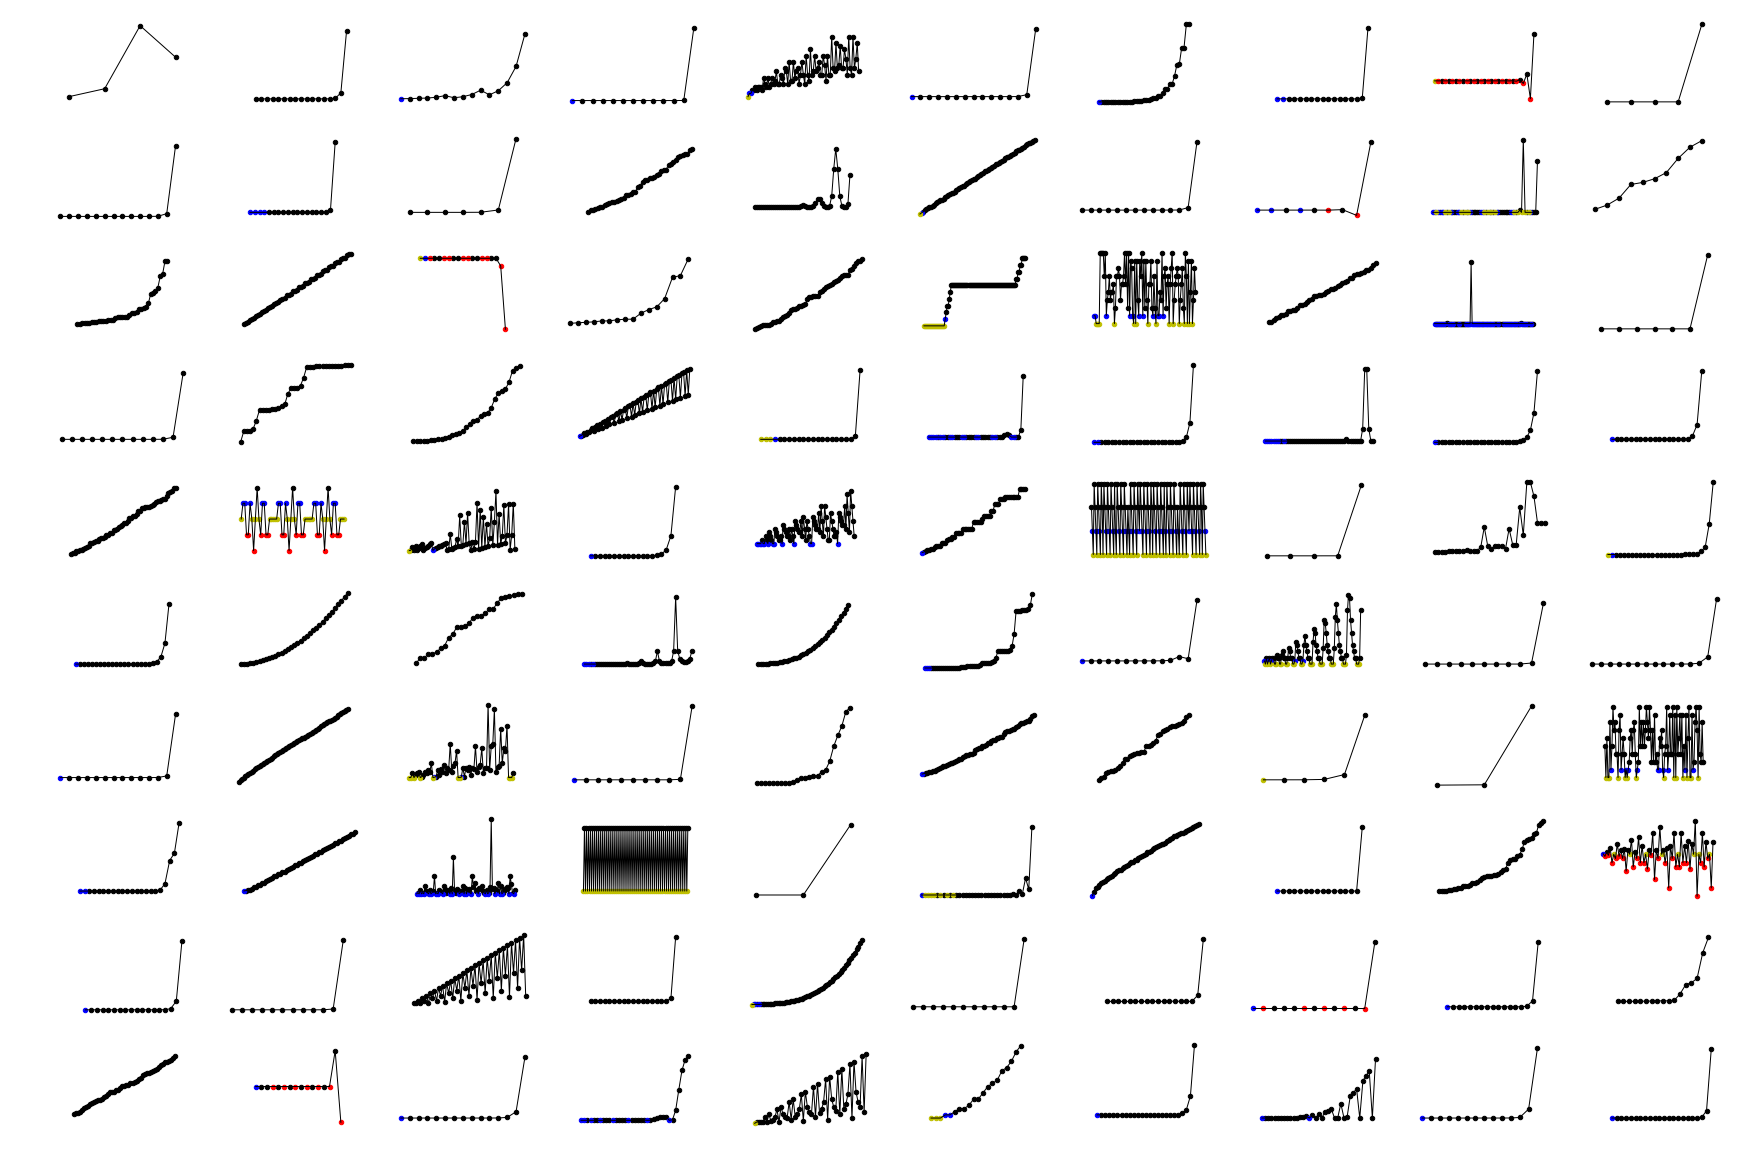

In [6]:
plt.rcParams['figure.figsize'] = (30, 20)

seq_ids = sample(sequences.keys(), 100)
fig, axs = plt.subplots(10, 10)
for ax, sid in zip(axs.ravel(), seq_ids):
    plot_seq(ax, sequences[sid])

# Monotonicity

In [7]:
def strictly_increasing(A):
    return all(x < y for x, y in zip(A, A[1:]))
    
def non_decreasing(A):
    return all(x <= y for x, y in zip(A, A[1:]))
    
def strictly_decreasing(A):
    return all(x > y for x, y in zip(A, A[1:]))
    
def non_increasing(A):
    return all(x >= y for x, y in zip(A, A[1:]))

def non_monotonic(A):
    return not any([strictly_increasing(A), strictly_decreasing(A), non_increasing(A), non_decreasing(A)])

In [58]:
A0 = list(filter(lambda x: strictly_increasing(x[1]), sequences.items()))
A1 = list(filter(lambda x: non_decreasing(x[1]), sequences.items()))
A2 = list(filter(lambda x: strictly_decreasing(x[1]), sequences.items()))
A3 = list(filter(lambda x: non_increasing(x[1]), sequences.items()))
A4 = list(filter(lambda x: non_monotonic(x[1]), sequences.items()))

As = [A0,A1,A2,A3,A4]
Ns = ["strictly increasing", "non-decreasing", "strictly increasing", "non-increasing", "non-monotonic"]

print(len(A0))
print(len(A1))
print(len(A2))
print(len(A3))
print(len(A4))

60002
72585
272
468
40870


In [9]:
def things(Y):
    X = np.linspace(1,len(Y), len(Y))
    return X[:-1],Y[:-1],X[-1],Y[-1]

# Linear Fits

In [28]:
from scipy import polyfit, poly1d
import warnings
warnings.simplefilter('ignore', np.RankWarning)

def linear(A):
    if len(A) > 1:
        xtest, ytest, x, y = things(A)
        f = poly1d(polyfit(xtest, ytest, 1))
        return True if all(f(np.linspace(1,len(A),len(A))).round() == A) else False
    return False

In [29]:
Alin = list(filter(lambda x: linear(x[1]), sequences.items()))
print(len(Alin))

/home/jackft/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:1930: RuntimeWarning: overflow encountered in square
  resids = array([sum((ravel(bstar)[n:])**2)],


678


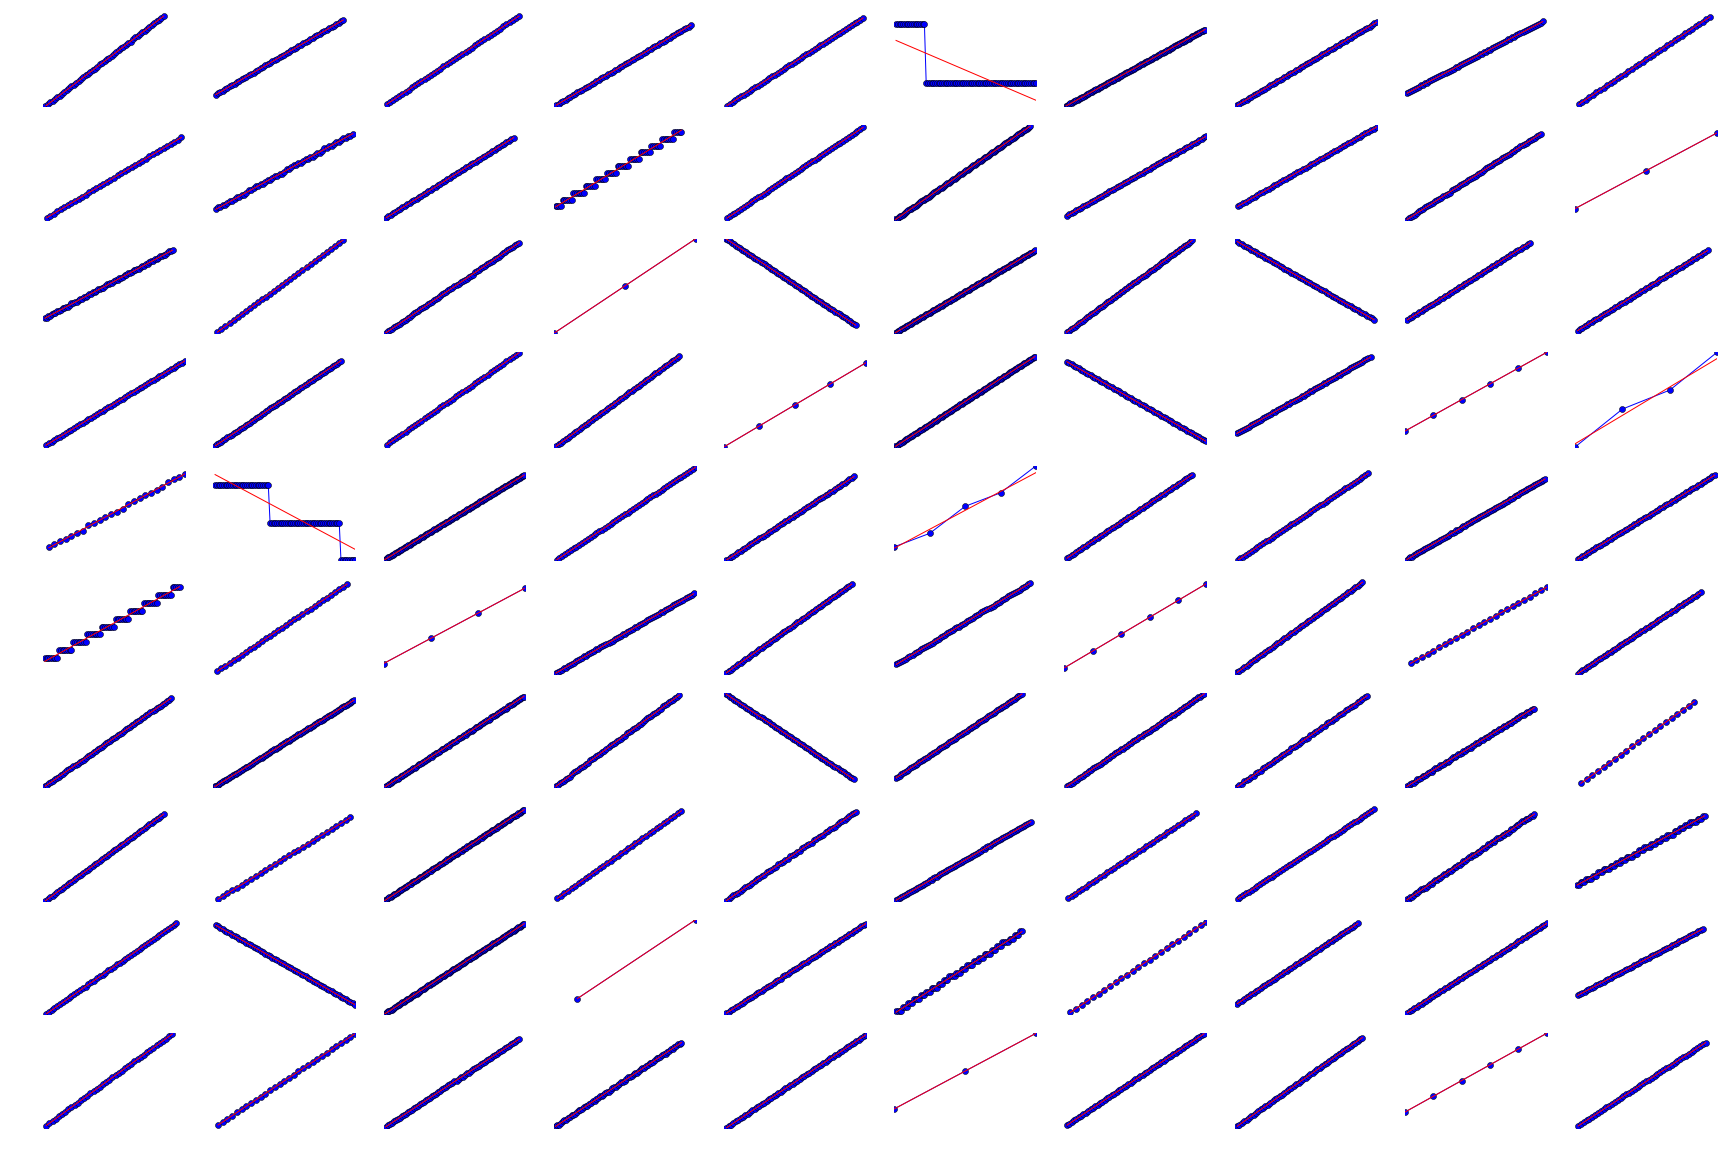

In [50]:
fig, axs = plt.subplots(10, 10)
for ax, (idx, A) in zip(axs.ravel(), sample(Alin,100)):
    X = np.linspace(1,len(A),len(A))
    ax.plot(X,A, color='b',marker='o')
    xtest, ytest, _, _ = things(A)
    ax.plot(X, poly1d(polyfit(xtest, ytest, 1))(np.linspace(1,len(A),len(A))),color='r')
    ax.axis('off')

In [60]:
for A, N in zip(As, Ns):
    print(N, ' :', len(list(filter(lambda x: linear(x[1]), A)))/float(len(A)))

strictly increasing  : 0.00928302389920336
non-decreasing  : 0.008968795205620996
strictly increasing  : 0.08088235294117647
non-increasing  : 0.10042735042735043


/home/jackft/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:1930: RuntimeWarning: overflow encountered in square
  resids = array([sum((ravel(bstar)[n:])**2)],


non-monotonic  : 0.0


# Quad Fits

In [32]:
from scipy import polyfit, poly1d
import warnings
warnings.simplefilter('ignore', np.RankWarning)

def quad(A):
    if len(A) > 1:
        xtest, ytest, x, y = things(A)
        f = poly1d(polyfit(xtest, ytest, 2))
        return True if all(f(np.linspace(1,len(A),len(A))).round() == A) else False
    return False

In [33]:
Aquad = list(filter(lambda x: quad(x[1]), sequences.items()))
print(len(Aquad))

/home/jackft/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:1930: RuntimeWarning: overflow encountered in square
  resids = array([sum((ravel(bstar)[n:])**2)],


1480


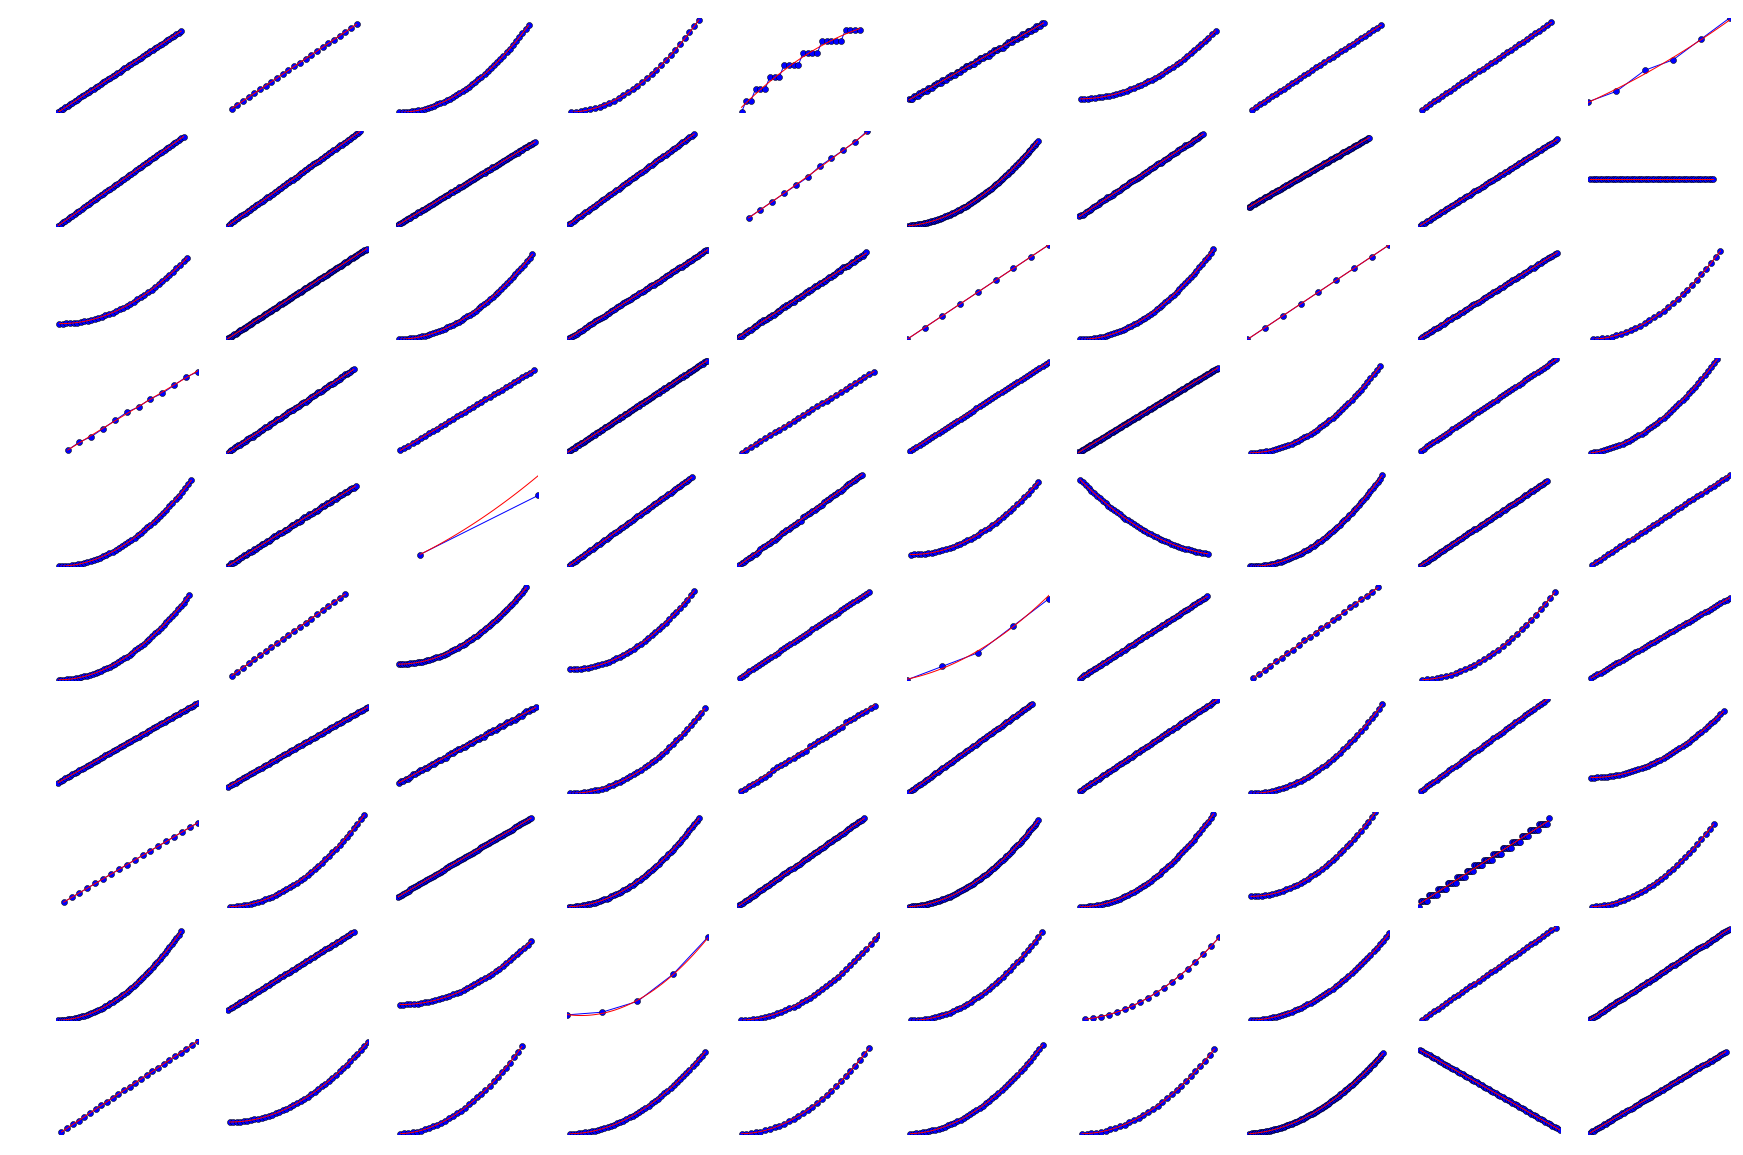

In [49]:
fig, axs = plt.subplots(10, 10)
for ax, (idx, A) in zip(axs.ravel(), sample(Aquad,100)):
    X = np.linspace(1,len(A),len(A))
    ax.plot(X,A, color='b',marker='o')
    xtest, ytest, _, _ = things(A)
    ax.plot(np.linspace(1,len(A),100), poly1d(polyfit(xtest, ytest, 2))(np.linspace(1,len(A),100)),color='r')
    ax.axis('off')

In [61]:
for A, N in zip(As, Ns):
    print(N, ' :', len(list(filter(lambda x: quad(x[1]), A)))/float(len(A)))

strictly increasing  : 0.021299290023665877
non-decreasing  : 0.019618378452848386
strictly increasing  : 0.11029411764705882
non-increasing  : 0.11538461538461539


/home/jackft/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:1930: RuntimeWarning: overflow encountered in square
  resids = array([sum((ravel(bstar)[n:])**2)],


non-monotonic  : 0.0005138243210178616


# poly3 Fits

In [35]:
from scipy import polyfit, poly1d
import warnings
warnings.simplefilter('ignore', np.RankWarning)
def poly3(A):
    if len(A) > 1:
        xtest, ytest, x, y = things(A)
        f = poly1d(polyfit(xtest, ytest, 3))
        return True if all(f(np.linspace(1,len(A),len(A))).round() == A) else False
    return False

In [36]:
Apoly3 = list(filter(lambda x: poly3(x[1]), sequences.items()))
print(len(Apoly3))

/home/jackft/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:1930: RuntimeWarning: overflow encountered in square
  resids = array([sum((ravel(bstar)[n:])**2)],


1972


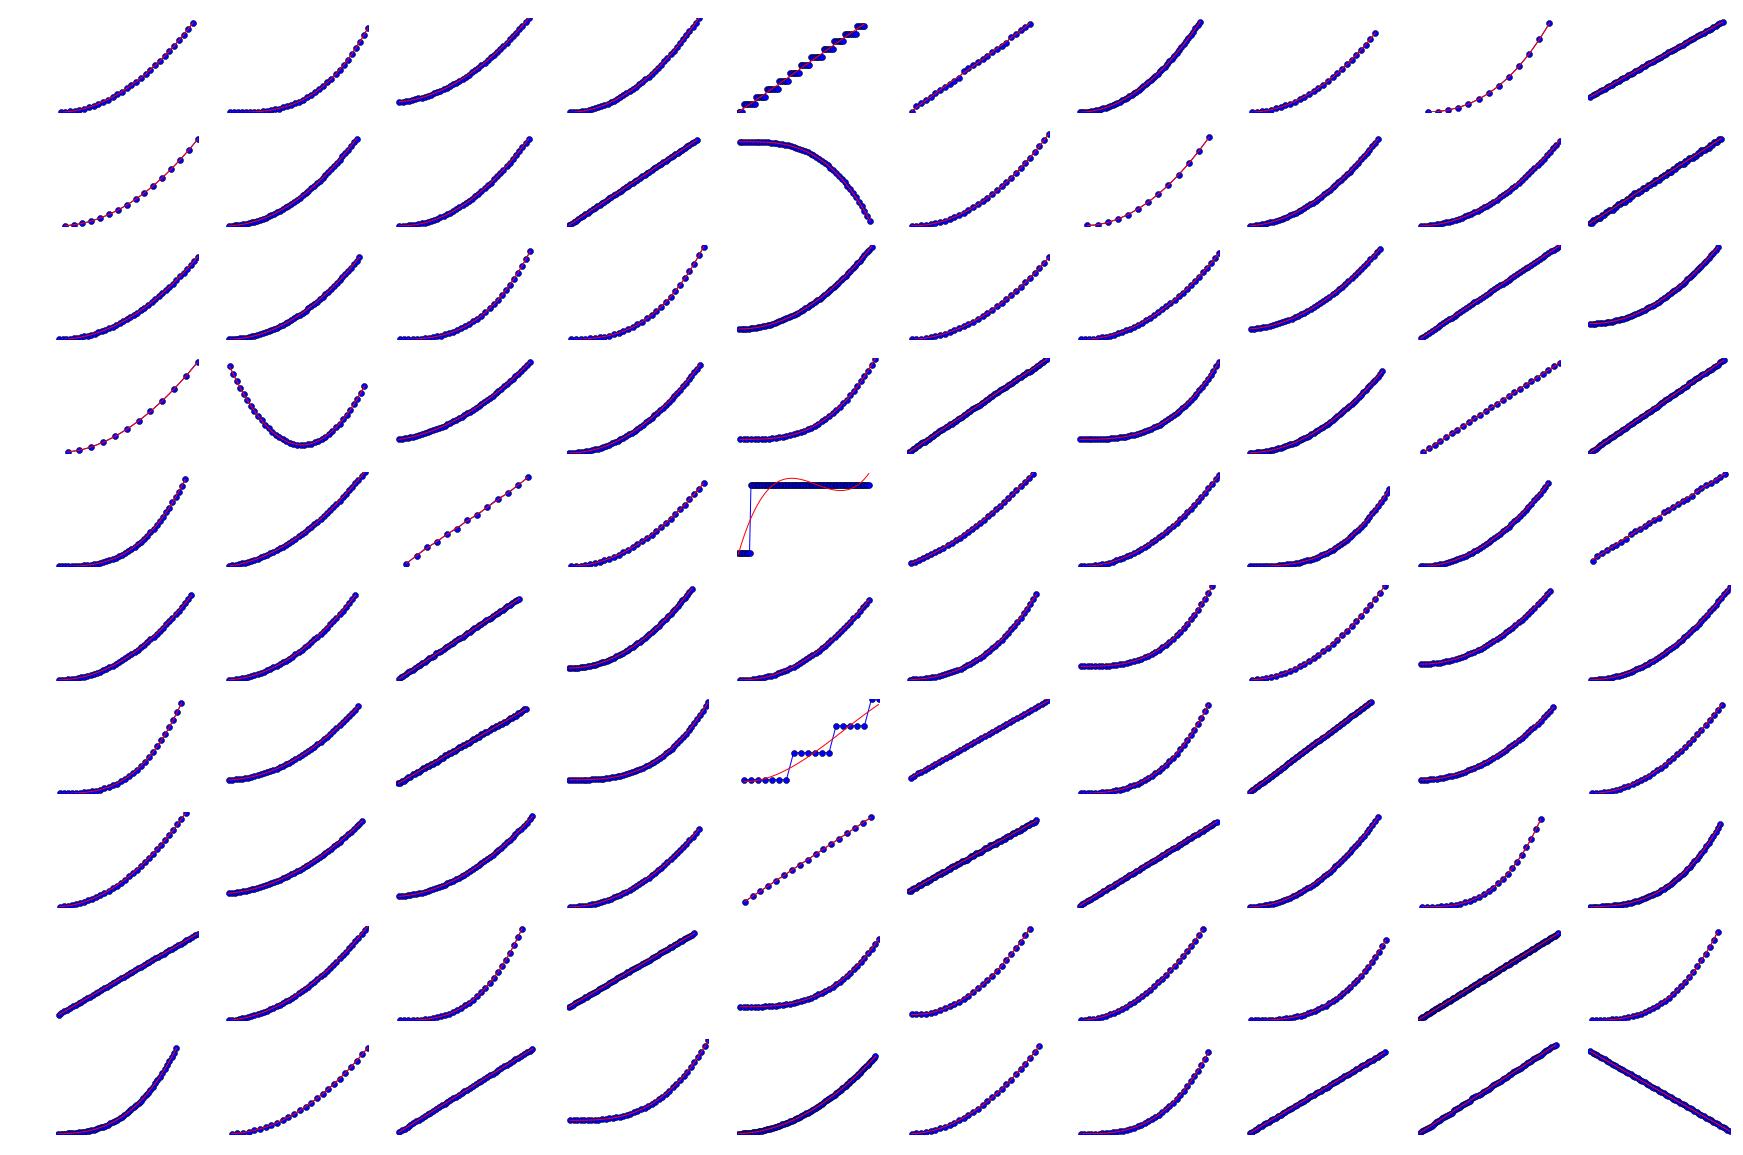

In [48]:
fig, axs = plt.subplots(10, 10)
for ax, (idx, A) in zip(axs.ravel(), sample(Apoly3,100)):
    X = np.linspace(1,len(A),len(A))
    ax.plot(X,A, color='b',marker='o')
    xtest, ytest, _, _ = things(A)
    ax.plot(np.linspace(1,len(A),100), poly1d(polyfit(xtest, ytest, 3))(np.linspace(1,len(A),100)),color='r')
    ax.axis('off')

In [62]:
for A, N in zip(As, Ns):
    print(N, ' :', len(list(filter(lambda x: poly3(x[1]), A)))/float(len(A)))

strictly increasing  : 0.028132395586813772
non-decreasing  : 0.026065991596059792
strictly increasing  : 0.11029411764705882
non-increasing  : 0.1111111111111111


/home/jackft/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:1930: RuntimeWarning: overflow encountered in square
  resids = array([sum((ravel(bstar)[n:])**2)],


non-monotonic  : 0.0011499877660875947


# Poly4

In [38]:
from scipy import polyfit, poly1d
import warnings
warnings.simplefilter('ignore', np.RankWarning)

def poly4(A):
    if len(A) > 1:
        xtest, ytest, x, y = things(A)
        f = poly1d(polyfit(xtest, ytest, 4))
        return True if all(f(np.linspace(1,len(A),len(A))).round() == A) else False
    return False

In [39]:
Apoly4 = list(filter(lambda x: poly4(x[1]), sequences.items()))
print(len(Apoly4))

/home/jackft/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:1930: RuntimeWarning: overflow encountered in square
  resids = array([sum((ravel(bstar)[n:])**2)],


2364


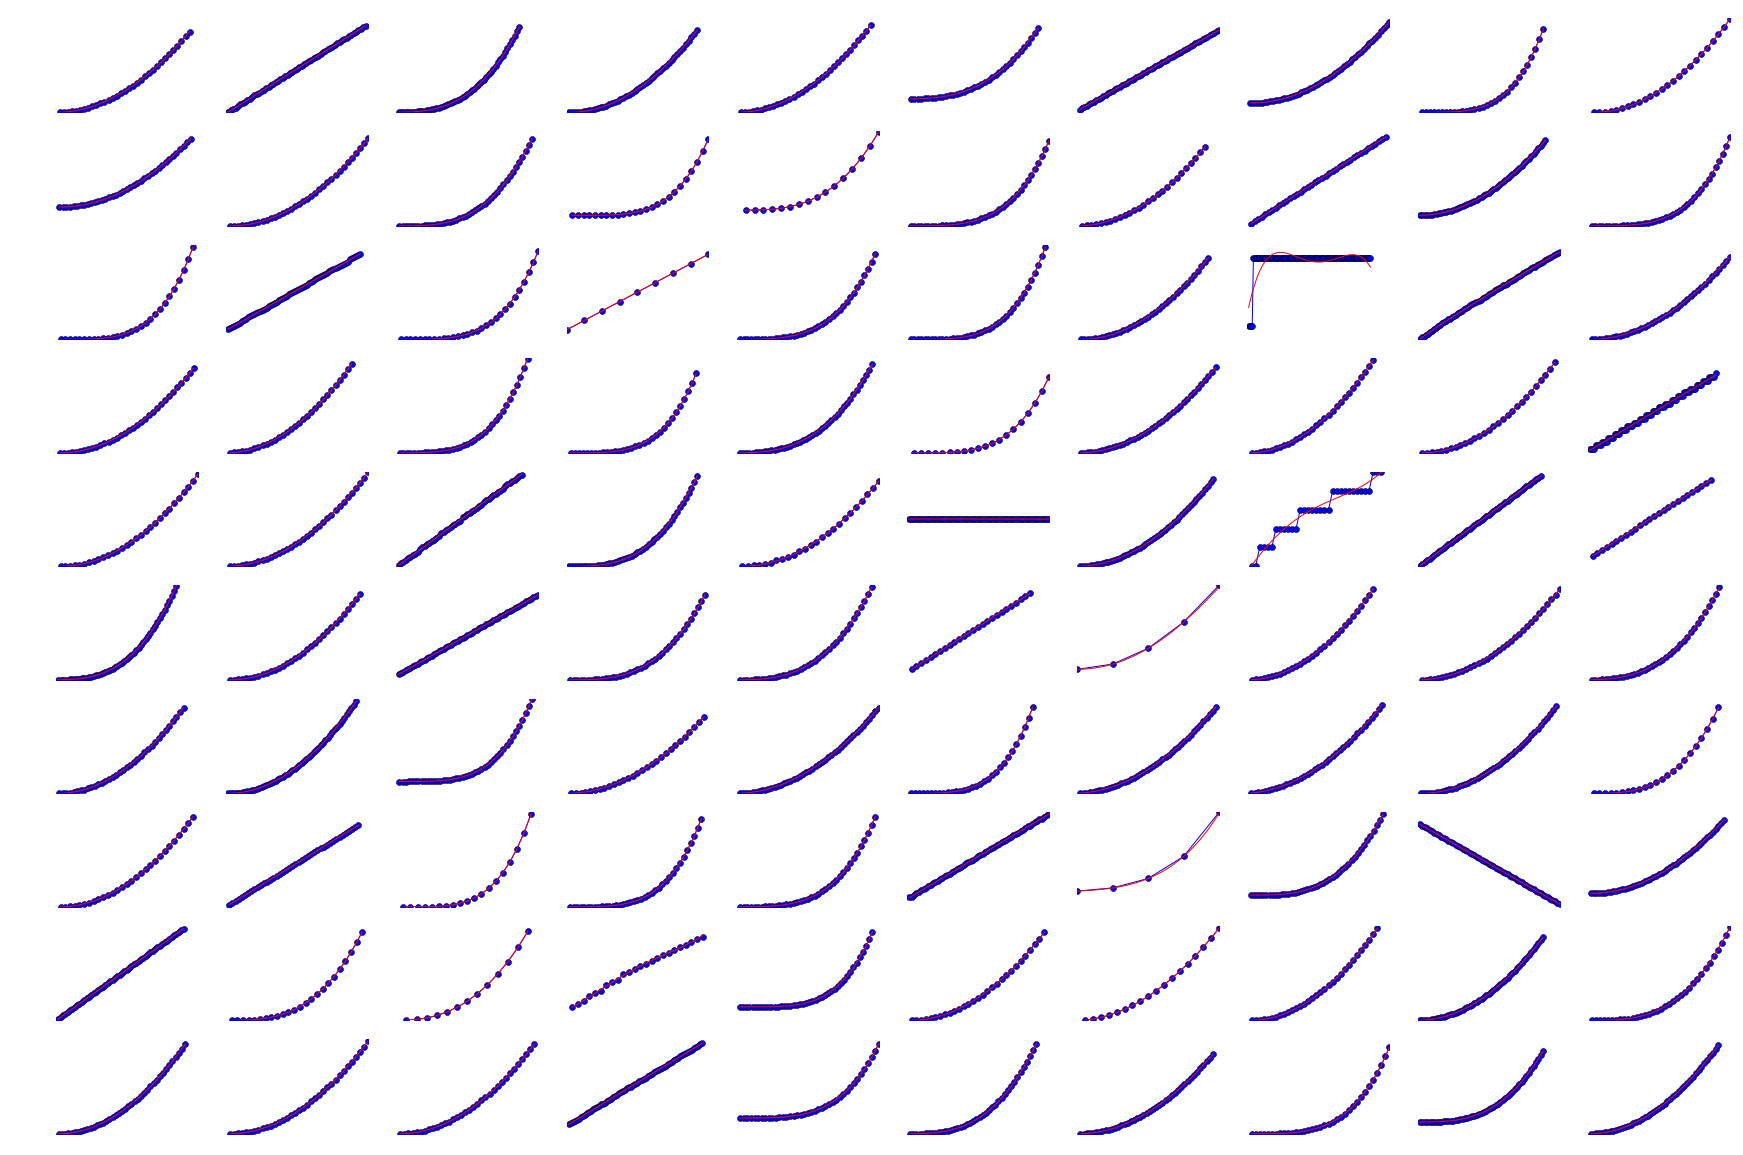

In [51]:
fig, axs = plt.subplots(10, 10)
for ax, (idx, A) in zip(axs.ravel(), sample(Apoly4,100)):
    X = np.linspace(1,len(A),len(A))
    ax.plot(X,A, color='b',marker='o')
    xtest, ytest, _, _ = things(A)
    ax.plot(np.linspace(1,len(A),100), poly1d(polyfit(xtest, ytest, 4))(np.linspace(1,len(A),100)),color='r')
    ax.axis('off')

In [63]:
for A, N in zip(As, Ns):
    print(N, ' :', len(list(filter(lambda x: poly4(x[1]), A)))/float(len(A)))

strictly increasing  : 0.03324889170360988
non-decreasing  : 0.03103947096507543
strictly increasing  : 0.10661764705882353
non-increasing  : 0.1388888888888889


/home/jackft/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:1930: RuntimeWarning: overflow encountered in square
  resids = array([sum((ravel(bstar)[n:])**2)],


non-monotonic  : 0.0015904086126743333


# Poly5

In [41]:
from scipy import polyfit, poly1d
import warnings
warnings.simplefilter('ignore', np.RankWarning)

def poly5(A):
    if len(A) > 1:
        xtest, ytest, x, y = things(A)
        f = poly1d(polyfit(xtest, ytest, 5))
        return True if all(f(np.linspace(1,len(A),len(A))).round() == A) else False
    return False

In [42]:
Apoly5 = list(filter(lambda x: poly5(x[1]), sequences.items()))
print(len(Apoly5))

/home/jackft/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:1930: RuntimeWarning: overflow encountered in square
  resids = array([sum((ravel(bstar)[n:])**2)],


2684


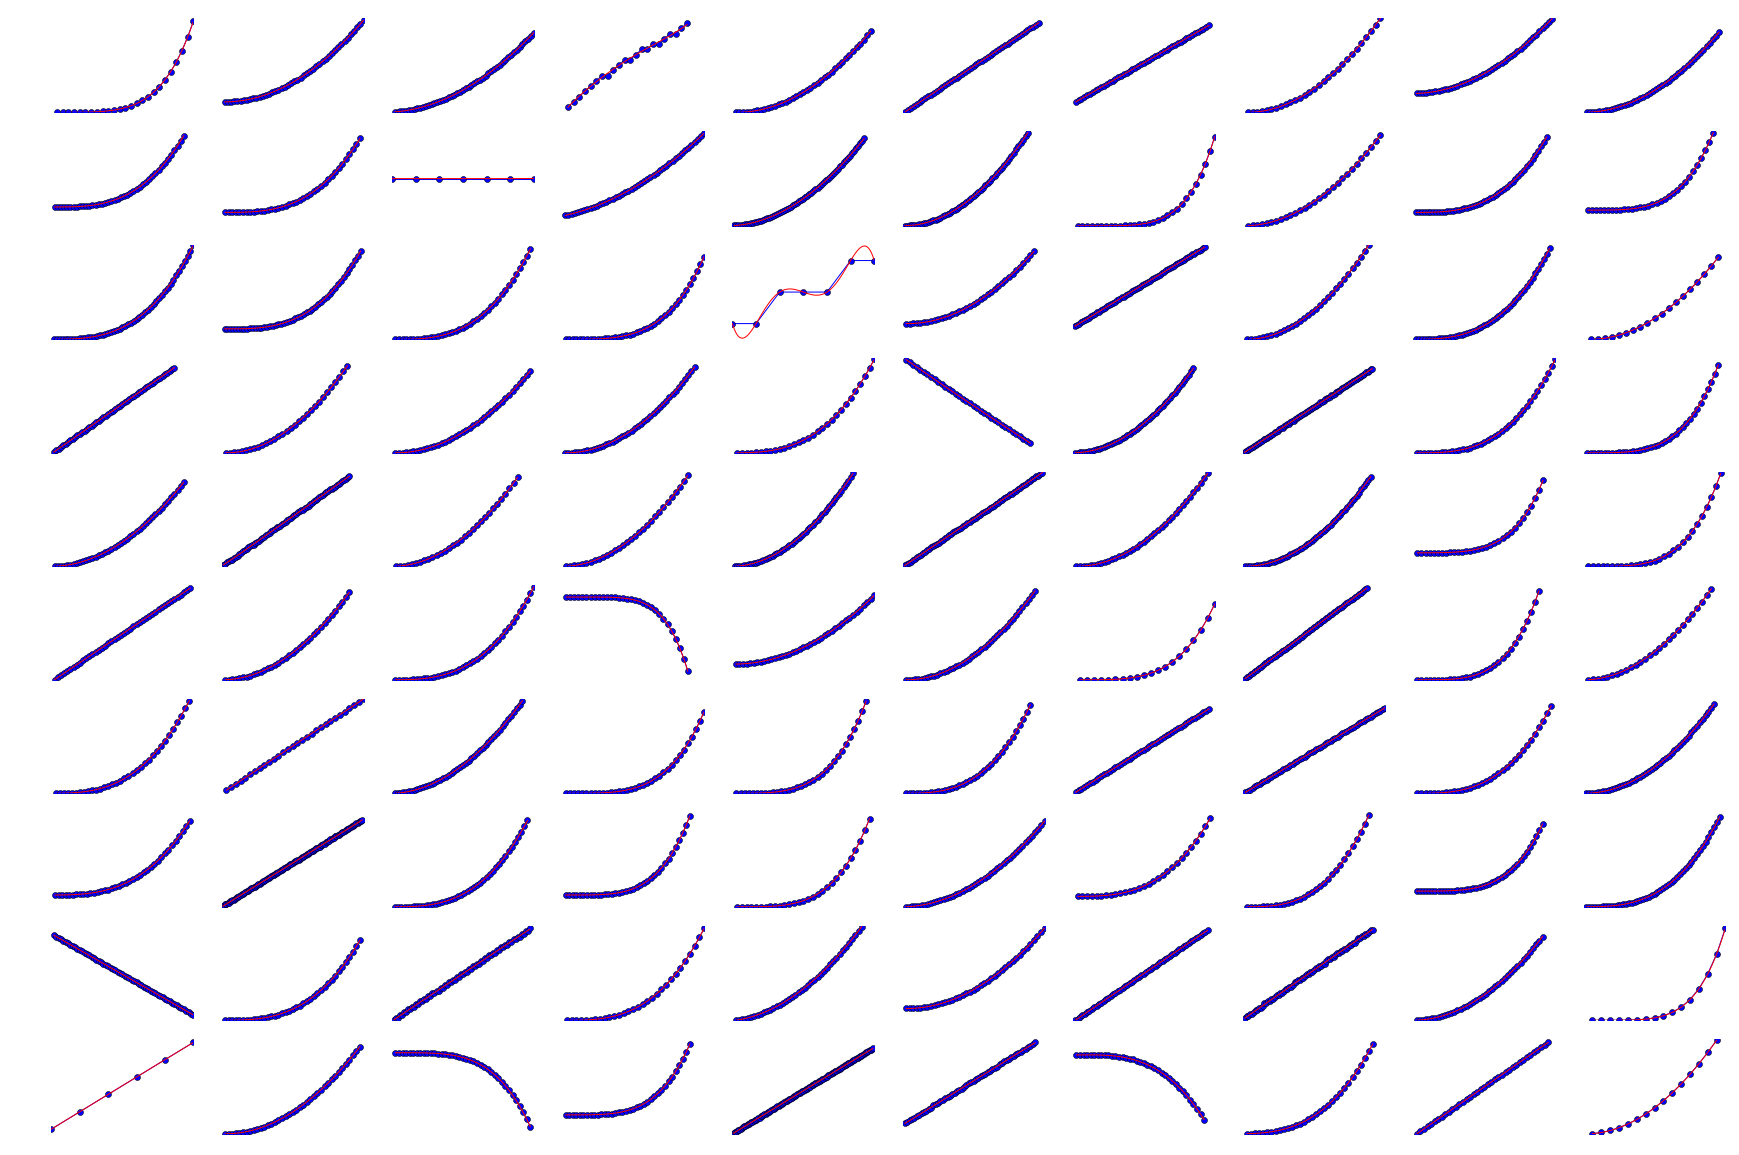

In [47]:
fig, axs = plt.subplots(10, 10)
for ax, (idx, A) in zip(axs.ravel(), sample(Apoly5,100)):
    X = np.linspace(1,len(A),len(A))
    ax.plot(X,A, color='b',marker='o')
    xtest, ytest, _, _ = things(A)
    ax.plot(np.linspace(1,len(A),100), poly1d(polyfit(xtest, ytest, 5))(np.linspace(1,len(A),100)),color='r')
    ax.axis('off')

In [64]:
for A, N in zip(As, Ns):
    print(N, ' :', len(list(filter(lambda x: poly5(x[1]), A)))/float(len(A)))

strictly increasing  : 0.03781540615312823
non-decreasing  : 0.0352276641179307
strictly increasing  : 0.11397058823529412
non-increasing  : 0.16452991452991453


/home/jackft/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:1930: RuntimeWarning: overflow encountered in square
  resids = array([sum((ravel(bstar)[n:])**2)],


non-monotonic  : 0.0016882799119158306


# Poly6

In [44]:
from scipy import polyfit, poly1d
import warnings
warnings.simplefilter('ignore', np.RankWarning)

def poly6(A):
    if len(A) > 1:
        xtest, ytest, x, y = things(A)
        f = poly1d(polyfit(xtest, ytest, 6))
        return True if all(f(np.linspace(1,len(A),len(A))).round() == A) else False
    return False

In [45]:
Apoly6 = list(filter(lambda x: poly6(x[1]), sequences.items()))
print(len(Apoly6))

/home/jackft/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:1930: RuntimeWarning: overflow encountered in square
  resids = array([sum((ravel(bstar)[n:])**2)],


2866


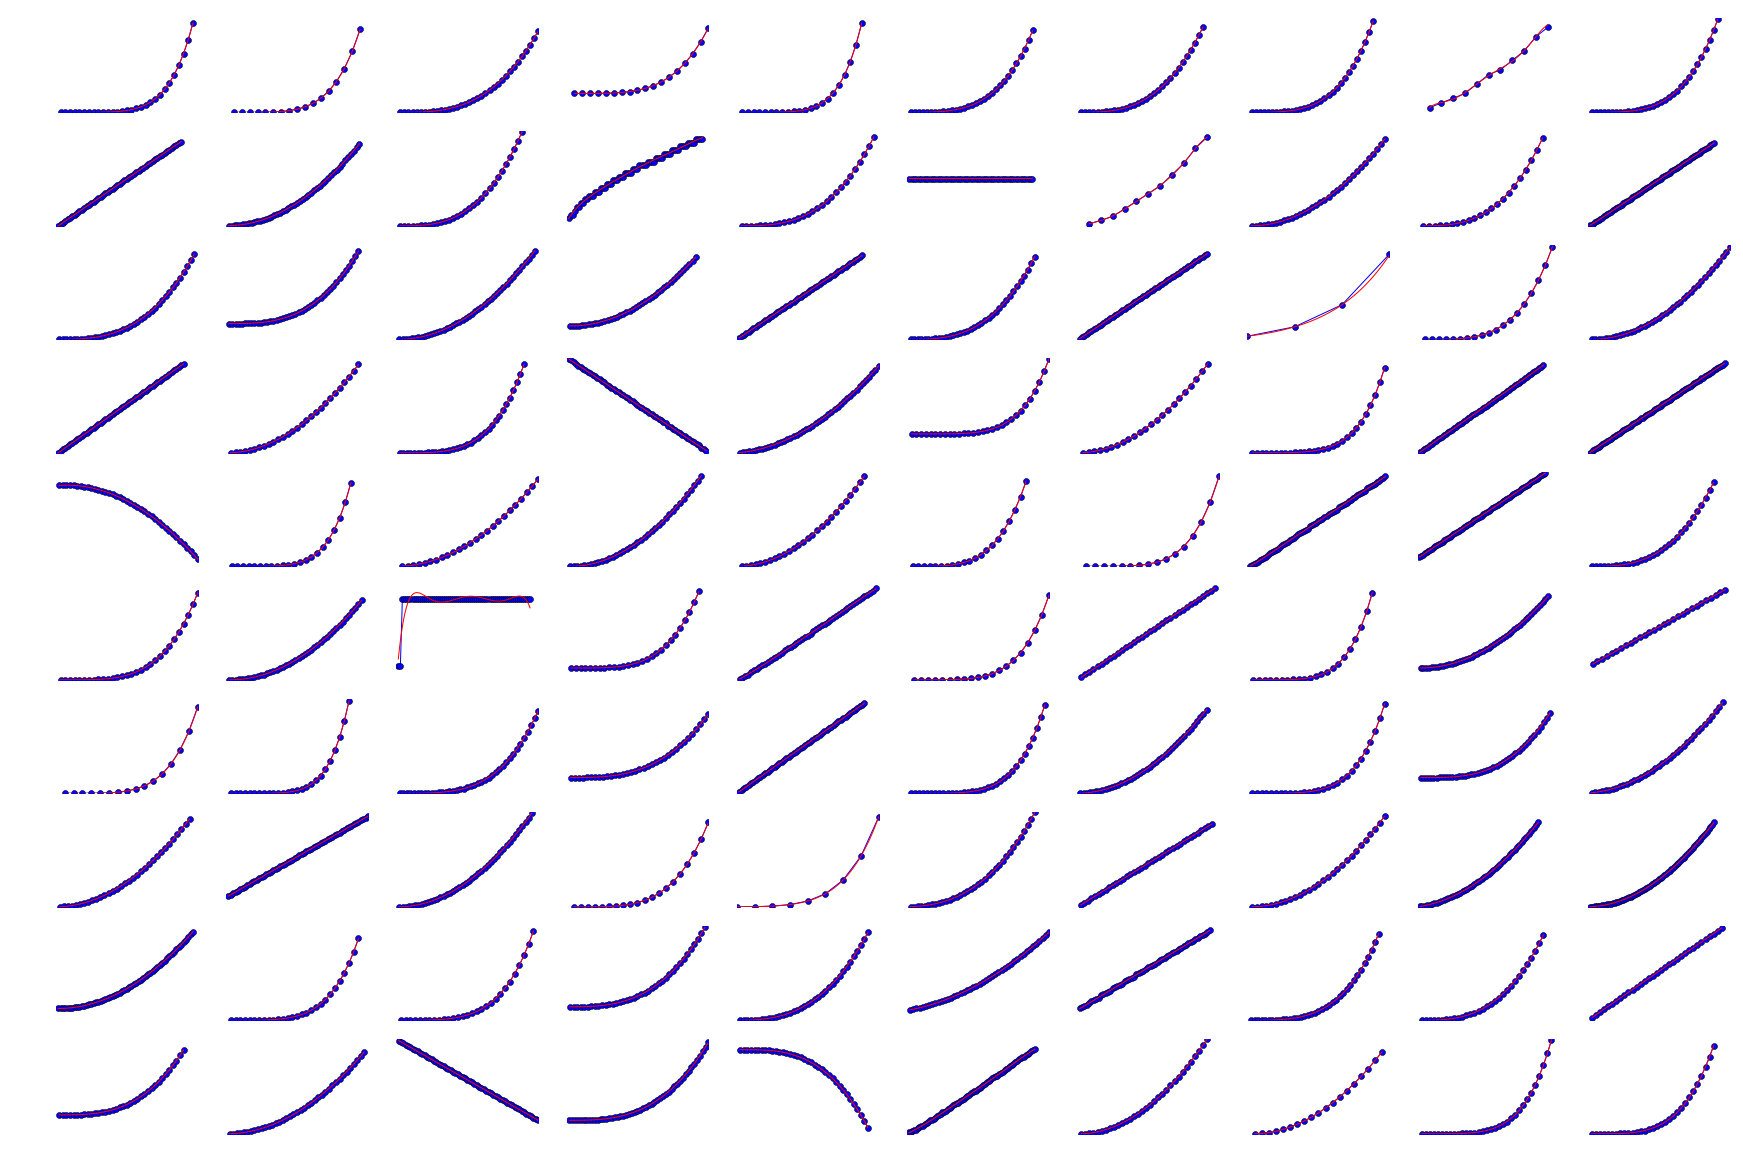

In [52]:
fig, axs = plt.subplots(10, 10)
for ax, (idx, A) in zip(axs.ravel(), sample(Apoly6,100)):
    X = np.linspace(1,len(A),len(A))
    ax.plot(X,A, color='b',marker='o')
    xtest, ytest, _, _ = things(A)
    ax.plot(np.linspace(1,len(A),100), poly1d(polyfit(xtest, ytest, 6))(np.linspace(1,len(A),100)),color='r')
    ax.axis('off')

In [65]:
for A, N in zip(As, Ns):
    print(N, ' :', len(list(filter(lambda x: poly6(x[1]), A)))/float(len(A)))

strictly increasing  : 0.04076530782307256
non-decreasing  : 0.03754219191292967
strictly increasing  : 0.1213235294117647
non-increasing  : 0.1858974358974359


/home/jackft/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:1930: RuntimeWarning: overflow encountered in square
  resids = array([sum((ravel(bstar)[n:])**2)],


non-monotonic  : 0.001786151211157328


# Polynomial Post-hoc

In [81]:
def jaccard(a,b):
    A = set(a)
    B = set(b)
    return len(A.intersection(B))/len(A.union(B))

In [82]:
polys = list(map(lambda A: list(map(lambda x: x[0], A)), [Alin, Aquad, Apoly3, Apoly4, Apoly5,Apoly6]))
pnames = ["linear", "quadratic", "cubic", "4order", "5order", "6order"]

for name1, name2, j in [(n1,n2,jaccard(p1,p2)) for p1, n1 in zip(polys, pnames) for p2, n2 in zip(polys, pnames) if n1 != n2]:
    print("jaccard similarity between ", name1, " and ", name2, " is: ", j)

jaccard similarity between  linear  and  quadratic  is:  0.3851091142490372
jaccard similarity between  linear  and  cubic  is:  0.281431334622824
jaccard similarity between  linear  and  4order  is:  0.22760290556900725
jaccard similarity between  linear  and  5order  is:  0.1968672125311499
jaccard similarity between  linear  and  6order  is:  0.17350993377483442
jaccard similarity between  quadratic  and  linear  is:  0.3851091142490372
jaccard similarity between  quadratic  and  cubic  is:  0.6596153846153846
jaccard similarity between  quadratic  and  4order  is:  0.5314741035856574
jaccard similarity between  quadratic  and  5order  is:  0.46054016134689585
jaccard similarity between  quadratic  and  6order  is:  0.41563517915309445
jaccard similarity between  cubic  and  linear  is:  0.281431334622824
jaccard similarity between  cubic  and  quadratic  is:  0.6596153846153846
jaccard similarity between  cubic  and  4order  is:  0.7448692152917505
jaccard similarity between  cubic

# Exponential

In [114]:
def exponential(A):
    if len(A) > 1:
        try:
            xtest, ytest, x, y = things(A)
            ytest = np.log(ytest)
            y = np.log(y)
            f = poly1d(polyfit(xtest, ytest, 6))
            return True if all(np.exp(f(np.linspace(1,len(A),len(A)))).round() == A) else False
        except:
            return False
    return False

In [118]:
Aexp = list(filter(lambda x: exponential(x[1]), list(sequences.items())))
print(len(Aexp))

/home/jackft/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log
/home/jackft/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log
/home/jackft/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log
/home/jackft/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


73
